In [152]:
import networkx as nx
import numpy as np
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
%matplotlib inline

## Load facebook network from file.

In [7]:
fb = nx.read_edgelist("../facebook_combined.txt")

In [5]:
# output edgelist to file
nx.write_edgelist(G,'fb.edgelist',data=False)

In [143]:
num_of_nodes = len(fb.nodes())
num_of_edges = len(fb.edges())

print('Number of nodes:', num_of_nodes)
print('Number of edges:', num_of_edges)

Number of nodes: 4039
Number of edges: 88234


### Computing degree assortativity of the graph.
### Assortativity measures the similarity of connections in the graph with respect to the node degree.
https://en.wikipedia.org/wiki/Assortativity

In [9]:
nx.degree_assortativity_coefficient(fb)

0.0635772291856496

### Degree Pearson correlation coefficient is the same as degree assortativity coefficient but uses the potentially faster Pearson function

In [10]:
nx.degree_pearson_correlation_coefficient(fb)

0.06357722918564918

## Analysis of Structural Properties

### Node degree, network minimum, maximum and average degree, degree distribution

In [49]:
degrees = [deg for node, deg in nx.degree(fb)]

In [50]:
# kmin - minimum degree
kmin = np.min(degrees)
print('Minimum degree',kmin)

# kmax - maximum degree
kmax = np.max(degrees)
print('Maximum degree',kmax)

# kavg - average degree of the network
kavg = np.mean(degrees)
print('Average degree',kavg)

Minimum degree 1
Maximum degree 1045
Average degree 43.69101262688784


### Degree distribution: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [23]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

### Plotting the degree distribution 

([array([105., 100.,  17.,   1.,   0.,   1.,   0.,   2.,   0.,   1.]),
  array([225.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([1.000e+00, 1.054e+02, 2.098e+02, 3.142e+02, 4.186e+02, 5.230e+02,
        6.274e+02, 7.318e+02, 8.362e+02, 9.406e+02, 1.045e+03]),
 <a list of 2 Lists of Patches objects>)

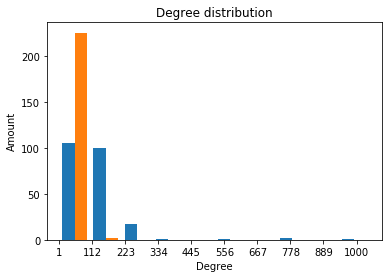

In [96]:
hist = degree_distr(fb)
x_ticks = np.linspace(1, 1000, 10)
plt.xticks(x_ticks)
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Amount')
plt.hist(hist)

### Get number of degrees with respect a condition (e.g. here greater that 200)

In [100]:
num_degrees_more_than_200 = np.sum( [d > 220 for d in degrees] )
print("There are", num_degrees_more_than_200, "nodes with degree more that 200")

There are 19 nodes with degree more that 200


### Paths on Networks: average path length, shortest path, longest path

In [ ]:
# find shortest path in directed & undirected network
path = nx.shortest_path(fb)
# nx.shortest_path(g,'b','d', weighted=True)

### Centrality measures
### Computing the degree centrality for nodes.
### The degree centrality for a node v is the fraction of nodes it is connected to.
https://en.wikipedia.org/wiki/Centrality

In [121]:
# degree centrality
centr = nx.degree_centrality(fb)

### Get node with the biggest degree centrality

In [122]:
max(centr, key=centr.get)

'107'

### Assortativity measures the similarity of connections in the graph with respect to the node degree.

* Pearson correlation coefficient [-1; 1]
* social networks are highly assortative (homophily): high degree nodes connect to other high degree nodes
* technological are disassortative: high degree nodes connect to low degree nodes

### Assortativity computed based on:
* degree
* attribute

In [126]:
# Compute degree assortativity of graph.
nx.degree_assortativity_coefficient(fb)


0.0635772291856496

/home/mario/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


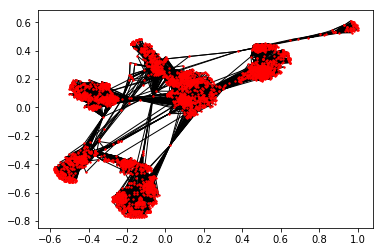

In [147]:
sp = nx.spring_layout(fb)
nx.draw_networkx(fb, pos=sp, with_labels=False, node_size=2)
plt.show()

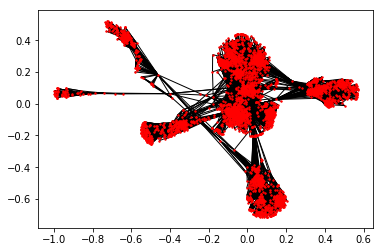

In [148]:
nx.draw_networkx(fb, with_labels=False, node_size=2)

## Visualize subgraphs

In [131]:
# assign selected subgraph to a new graph
neigbors_of_most_central = list(fb.neighbors('107'))
neigbors_of_most_central.append('107')
fb_sub = fb.subgraph(neigbors_of_most_central)

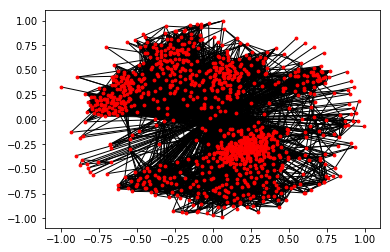

<Figure size 72x72 with 0 Axes>

In [140]:
# sp = nx.spring_layout(fb_sub)
nx.draw_networkx(fb_sub, with_labels=False, node_size=8)
plt.figure(figsize=(1,1))
plt.show()

### Queries On Networks

In [ ]:
# obtain a list of nodes with a certain property
sub_nodes = [n[0] for n in fb.nodes(data=True) if d['attribute'] == 'what we are interested in']

In [ ]:
# obtain a list of edges with a certain property
sub_edges = [edge for edge in fb.edges(data=True) if d['attribute'] == 'what we are interested in']

### Clustering coefficient
https://en.wikipedia.org/wiki/Clustering_coefficient

In [145]:
# check clustering coefficient
cc = nx.clustering(fb)
avg_cc_fb = sum(cc.values()) / len(cc)
print("Facebook network clustering coefficient:", avg_cc_fb)

Facebook network clustering coefficient: 0.6055467186200876


Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


/home/mario/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


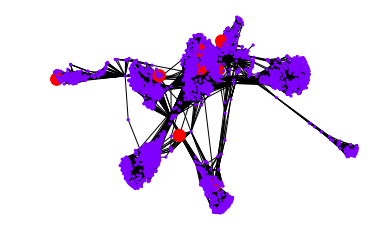

In [156]:
'''Exploratory Data Analysis'''
fb = nx.read_edgelist('../facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(fb))

'''Parallel Betweenness Centrality'''
from multiprocessing import Pool
import itertools

spring_pos = nx.spring_layout(fb)


def partitions(nodes, n):
    # '''Partitions the nodes into n subsets'''
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition


def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)


def between_parallel(G, processes=None):
    p = Pool(processes=processes)
    part_generator = 4 * len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G) / part_generator)))
    num_partitions = len(node_partitions)

    bet_map = p.map(btwn_pool,
                    zip([G] * num_partitions,
                        [True] * num_partitions,
                        [None] * num_partitions,
                        node_partitions))

    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


bt = between_parallel(fb)
top = 10

max_nodes = sorted(bt.items(), key=lambda v: -v[1])[:top]
bt_values = [5] * len(fb.nodes())
bt_colors = [0] * len(fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

plt.axis("off")
nx.draw_networkx(fb, pos=spring_pos, cmap=plt.get_cmap("rainbow"), node_color=bt_colors, node_size=bt_values,
                 with_labels=False)

plt.show()